<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
# from datetime import timedelta
from google.colab import files
import matplotlib.pyplot as plt

!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

In [ ]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
cdf

In [ ]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])

cdf

In [ ]:
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[8500:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Full Bath', ascending=False)
cdf = cdf.drop(cdf.index[8497:])
cdf

In [ ]:
cdf['Full Bath'].unique()

In [ ]:
cdf['Land_Use'] = cdf['Land Use']
cdf['Foundation_Type'] = cdf['Foundation Type']
cdf['Exterior_Wall'] = cdf['Exterior Wall']

cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']
cdf = cdf[cdf.Land_Use != 'QUADPLEX']

cdf = cdf[cdf.Foundation_Type != 'PIERS']

cdf = cdf[cdf.Exterior_Wall != 'CONC BLK']
cdf = cdf[cdf.Exterior_Wall != 'LOG']
cdf = cdf[cdf.Exterior_Wall != 'METAL']

cdf = cdf[cdf.Bedrooms <= 6]

cdf

In [ ]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
cdf.dtypes

In [ ]:
# 5 - Three aggregated coumns using groupby and transform
cdf['Avg_Price_By_Bedrooms'] = cdf.groupby('Bedrooms')['Sale Price'].transform('mean')
cdf['Avg_Price_By_Bedrooms'] = cdf['Avg_Price_By_Bedrooms'].astype(int)
cdf['Avg_Value_By_Bedrooms'] = cdf.groupby('Bedrooms')['Total Value'].transform('mean')
cdf['Avg_Value_By_Bedrooms'] = cdf['Avg_Value_By_Bedrooms'].astype(int)
cdf['Sales_by_city_count'] = cdf.groupby('Property City')['Land_Use'].transform('count')
cdf

In [51]:
# 4 - label-encoded, numbers associated with the type of property
land_use_map = { 'SINGLE FAMILY': 1,
                 'DUPLEX': 2,
                 'TRIPLEX': 3 }

cdf = cdf.replace({'Land_Use' : land_use_map})

cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,...,Exterior Wall,Bedrooms,Full Bath,Half Bath,Land_Use,Foundation_Type,Exterior_Wall,Avg_Price_By_Bedrooms,Avg_Value_By_Bedrooms,Sales_by_city_count
1140,DUPLEX,4009 SHUFELD CT,ANTIOCH,2014-07-15,141433.0,4009 SHUFELD CT,ANTIOCH,TN,0.28,24000.0,...,BRICK/FRAME,4.0,6.0,0.0,2,CRAWL,BRICK/FRAME,106464,122495,756
1216,DUPLEX,137 COLEMONT DR,ANTIOCH,2013-09-27,105000.0,137 COLEMONT DR,ANTIOCH,TN,0.32,24000.0,...,BRICK/FRAME,4.0,6.0,0.0,2,CRAWL,BRICK/FRAME,106464,122495,756
50369,TRIPLEX,1605 DOUGLAS AVE,NASHVILLE,2014-07-16,110000.0,1605 DOUGLAS AVE,NASHVILLE,TN,0.20,45000.0,...,STUCCO,5.0,4.0,0.0,3,CRAWL,STUCCO,104658,117163,4937
1484,DUPLEX,124 ROBERT YOEST DR,ANTIOCH,2016-05-24,148000.0,124 ROBERT YOEST DR,ANTIOCH,TN,0.60,24000.0,...,BRICK,6.0,4.0,0.0,2,FULL BSMT,BRICK,110787,99624,756
1350,DUPLEX,2791 PENNINGTON BEND RD,NASHVILLE,2013-12-18,135500.0,2791 PENNINGTON BEND RD,NASHVILLE,TN,0.41,30000.0,...,BRICK,4.0,4.0,0.0,2,FULL BSMT,BRICK,106464,122495,4937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,SINGLE FAMILY,922 14TH AVE N,NASHVILLE,2016-04-08,100000.0,922 14TH AVE N,NASHVILLE,TN,0.16,9000.0,...,FRAME,2.0,1.0,0.0,1,CRAWL,FRAME,96626,93957,4937
22871,SINGLE FAMILY,209 QUEEN AVE,NASHVILLE,2015-07-30,100000.0,209 QUEEN AVE,NASHVILLE,TN,0.21,10000.0,...,FRAME,5.0,1.0,1.0,1,PT BSMT,FRAME,104658,117163,4937
33559,SINGLE FAMILY,3016 RICH ACRES DR,NASHVILLE,2014-02-28,99999.0,3016 RICH ACRES DR,NASHVILLE,TN,0.56,27600.0,...,BRICK,3.0,1.0,1.0,1,CRAWL,BRICK,109277,119155,4937
23924,SINGLE FAMILY,213 DELVIN DR,ANTIOCH,2014-06-27,99900.0,213 DELVIN DR,ANTIOCH,TN,0.23,24000.0,...,BRICK,3.0,1.0,1.0,1,CRAWL,BRICK,109277,119155,756


In [15]:
#  Used to get the couns for Avg Sale Price based on number of bedrooms

# one_bed_cdf = cdf[cdf.Bedrooms == 1]
# one_bed_cdf
# two_bed_cdf = cdf[cdf.Bedrooms == 2]
# two_bed_cdf
# three_bed_cdf = cdf[cdf.Bedrooms == 3]
# three_bed_cdf
# four_bed_cdf = cdf[cdf.Bedrooms == 4]
# four_bed_cdf
# five_bed_cdf = cdf[cdf.Bedrooms == 5]
# five_bed_cdf
# six_bed_cdf = cdf[cdf.Bedrooms == 6]
# six_bed_cdf

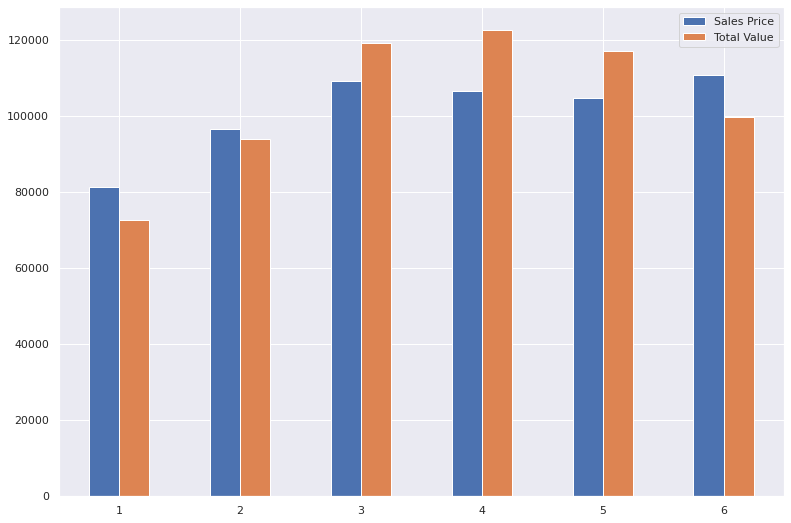

In [37]:
sales_price_avg = [81309, 96626, 109277, 106464, 104658, 110787]
 
total_value_avg = [72579, 93957, 119155, 122495, 117163, 99624]
 
index = ['1', '2', '3', '4', '5', '6']
 
tdf = pd.DataFrame({'Sales Price': sales_price_avg,
 
                   'Total Value': total_value_avg}, index=index)
 
ax = tdf.plot.bar(rot=0)

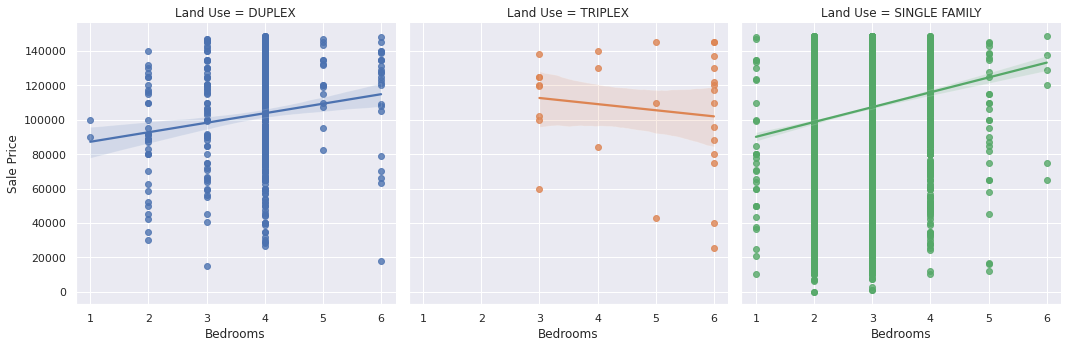

In [38]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col='Land Use', hue='Land Use')
# sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col = 'Property City', hue='Property City')

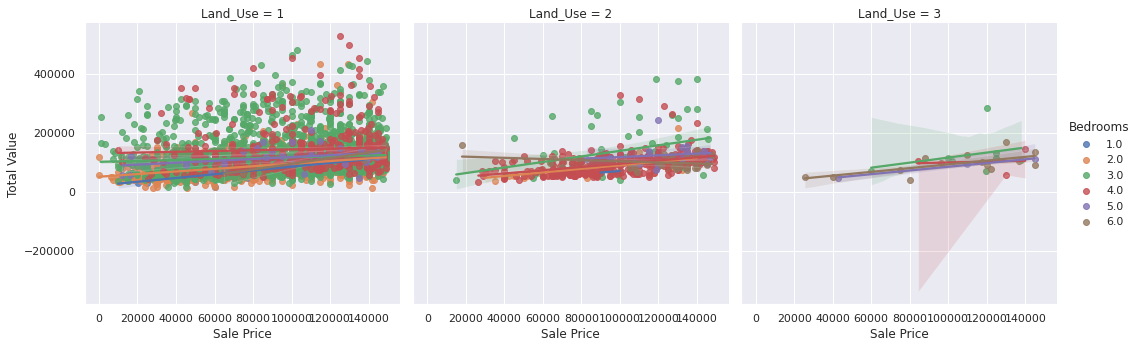

In [39]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', col='Land_Use',  hue='Bedrooms')

In [42]:
import plotly.express as px
fig = px.scatter_3d(cdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Land Use', size='Bedrooms', size_max= 20, 
                    symbol='Land Use', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [57]:
tdf = cdf[cdf.Bedrooms >= 3]
tdf = tdf[tdf.Bedrooms < 6]

tdf = tdf[tdf.Exterior_Wall != 'STUCCO']
tdf = tdf[tdf.Exterior_Wall != 'STONE']
tdf = tdf[tdf.Exterior_Wall != 'FRAME/STONE']

fig = px.scatter_3d(tdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Exterior_Wall', size='Bedrooms', size_max= 10, 
                    symbol='Exterior_Wall', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

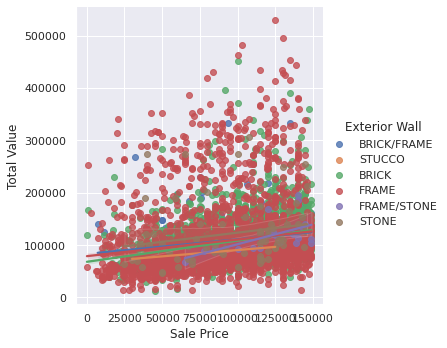

In [25]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', hue='Exterior Wall')

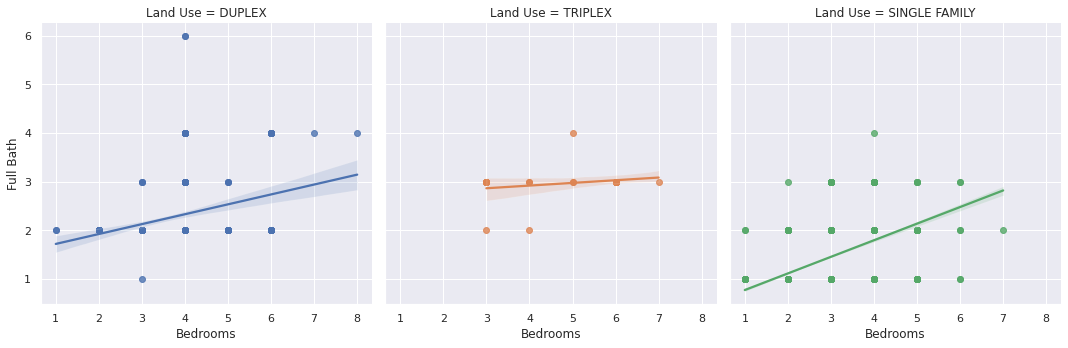

In [27]:
sns.lmplot(data = cdf, y='Full Bath', x='Bedrooms', col='Land Use', hue='Land Use')

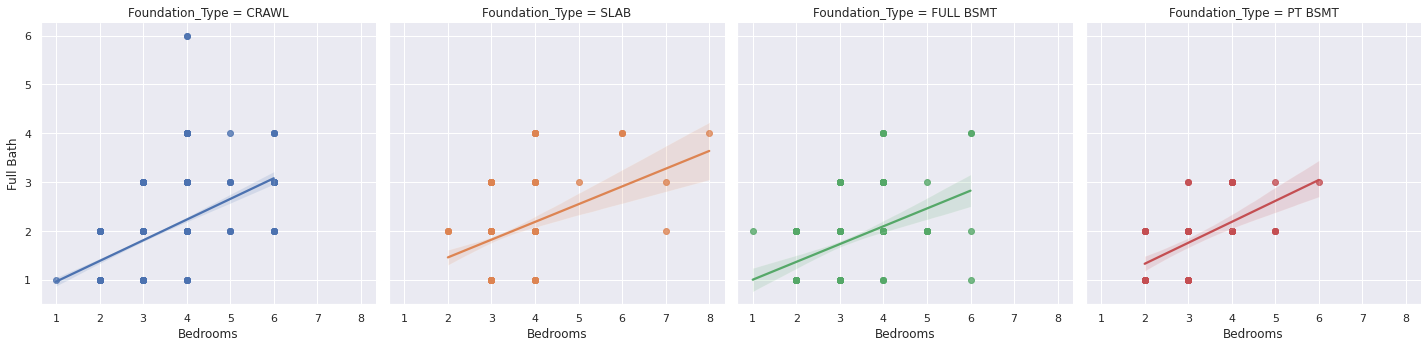

In [ ]:
sns.lmplot(data = cdf, y='Full Bath', x='Bedrooms', col='Foundation_Type', hue='Foundation_Type')

In [17]:
cdf['Property City'].unique()



array(['ANTIOCH', 'NASHVILLE', 'OLD HICKORY', 'MADISON', 'HERMITAGE',
       'GOODLETTSVILLE', 'MOUNT JULIET', 'WHITES CREEK', 'JOELTON'],
      dtype=object)